# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [2]:
inDir =  '/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/ExampleData/300kw/'
print('The input dir is: %s'%inDir)


The input dir is: /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/ExampleData/300kw/


In [3]:
print( ls_dir( inDir) )
print(len(ls_dir(inDir)))

['SSY_Pt-Fe3O4-15h-Si-1_0.0500deg_ts2021-10-31-07-57-45_dt302_x13000.00_y372.87_z372.87_det5000.00m_expt1s_sid00016639_000001_WAXS.tif'
 'SSY_Pt-Fe3O4-15h-Si-3_0.3000deg_ts2021-10-31-12-23-37_dt2149_x11999.75_y370.34_z370.34_det5000.00m_expt1s_sid00019074_000001_WAXS.tif'
 'SSY_Pt-Fe3O4-2h-Si-1_0.1500deg_ts2021-10-31-08-46-54_dt385_x13000.06_y233.41_z233.41_det5000.00m_expt1s_sid00017086_000001_WAXS.tif'
 'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6_x-2003.52_y3149.81_z-603.70_waxs00.00_expt1.1s_sid00004413_000001_WAXS.tif']
4


In [4]:
outDir = '/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/'
#outDir = '/home/yuzhang/Results/'
outDir = create_fullpath(  outDir )
outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/  already exists
Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/HDF_Results/  already exists
Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [5]:
username = 'SYang'
username_short = 'SYang'
username_short = ''

flist = ls_dir( inDir, or_list=[    ], and_list= [ 'tif',  ],no_list=[ 'deg'  ])
#flist = ls_dir( inDir, or_list=[    ], and_list= [ 'Cell'],no_list=[  ])

_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs
flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_d'  ] )
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_short))

There are 1 files for user:  in this run.


In [6]:
flists_clean

array(['SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6_x-2004_y3150_z-604_waxs00.00_expt1.1s_sid00004413_000001_WAXS.tif'],
      dtype='<U109')

In [7]:
flists 

['SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6_x-2003.52_y3149.81_z-603.70_waxs00.00_expt1.1s_sid00004413_000001_WAXS.tif']

### Using a two-layered dict to sort the files 

In [8]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [9]:
# cut_pattern= r'(_waxs)'
cut_pattern= r'(_x)'
#cut_pattern= r'(deg)'
#cut_pattern= r'[_](\d+)[.](\d+)(deg)[_]'
#cut_pattern= r'(deg)'


sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys())
N = len(ks)
print( 'There are %s samples.'%(N))

There are 1 samples.


In [10]:
sams

{'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6': 1}

In [11]:
ks

['SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6']

In [12]:
ks[0], sam_dict[ks[0]]

('SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6',
 ['SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6_x-2003.52_y3149.81_z-603.70_waxs00.00_expt1.1s_sid00004413_000001_WAXS.tif'])

##  Load Mask if has one

In [13]:
#mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
#show_img(mask)
mask = None

## Define data analysis parameters and methods

### A GiWAXS

In [14]:
beamline = 'SMI'
cycle='2021_C3'


geometry   =  'Transmission'
QX = 'Qtx'
QY = 'Qty'
det_str =  'Pilatus300kw'
wav_m = 1E-10 * (12.398/16.1) #* 1.004
sdd_mm = 273.9  + 9   #+ 6 


bs_xy = [  305,  1071  ]
b_xy = [ 97, 1475 + 400   ]     #not accurate, need to be updated, 2021/12/24
bs_xys = [  [0,0] ] # for  20


#bs_xys = None
bs_x_dict = None
incident_angle = 0
hotpixel_thres = 1e6
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                bs_xys = bs_xys, 
                bs_x_dict = bs_x_dict,
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )  
rot_angle_start = 0
rot_angle_step = 5 #20 #6.5   

#rot_angle0 = -np.array( [ 0, 5, 7,  10, 15, 20,  25, 27,  30, 35, 40, 45, 47,  50 , 55 , 60  ]) 
#rot_angle0 = -np.array( [ 0, 5,  15,  25  ]) 
rot_angle0 = -np.array( [ 0 + 8  ])     #not accurate, need to be updated, 2021/12/24

## Setup the class
SC = SMI_Scattering( pargs_sc  )
#SC.set_rotation_angles( rot_angle  ) 
#SC.create_ai()
print(b_xy)
print( sdd_mm, wav_m)

[97, 1875]
282.9 7.700621118012422e-11


### Methods

In [15]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F  
save_HDF=T
load_sticth = F

if T:    
    ###########################
    #for WAXS
    ###########################   
    do_plot_raw = T #T #T # True
    save_raw = F
    check_stitch = T#T        
    do_stitch = T #T ## T 
    do_plot_stich = T #T # True
    do_Qciravg = T #T #T
    show_Qciravg_roi = T # T #T 
    
    
    do_Qciravg_sector = F   
    show_Qciravg_sector = F    
    Qciravg_sector_angle_wid = 10 
    Qciravg_sector_angles = [  10,  30,  50, 70, 90    ]  
    do_Qqphi = T 
    do_q_qphi = F
    do_p_qphi = F       
    

In [16]:
ks

['SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6']

In [17]:
sample_list = ks #[50:51] #[ 4: 5]
#sample_list = ks   #use a dummy papemill to run this
#sample_list = [ ks[6] ]    #use a dummy papemill to run this

#sample_list = ks [ :1 ]
print( sample_list )
print( sam_dict[ sample_list[0]])

['SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6']
['SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6_x-2003.52_y3149.81_z-603.70_waxs00.00_expt1.1s_sid00004413_000001_WAXS.tif']


In [18]:
#plt.ioff()  #Turn off the plots
#plt.ion()  #Turn on the plots

## Do Analysis here

The sample is: SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.
['/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/ExampleData/300kw/SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6_x-2003.52_y3149.81_z-603.70_waxs00.00_expt1.1s_sid00004413_000001_WAXS.tif']
The rotation angles are: [-8].
Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/WAXS_300/  already exists
The pz is:0


<IPython.core.display.Javascript object>


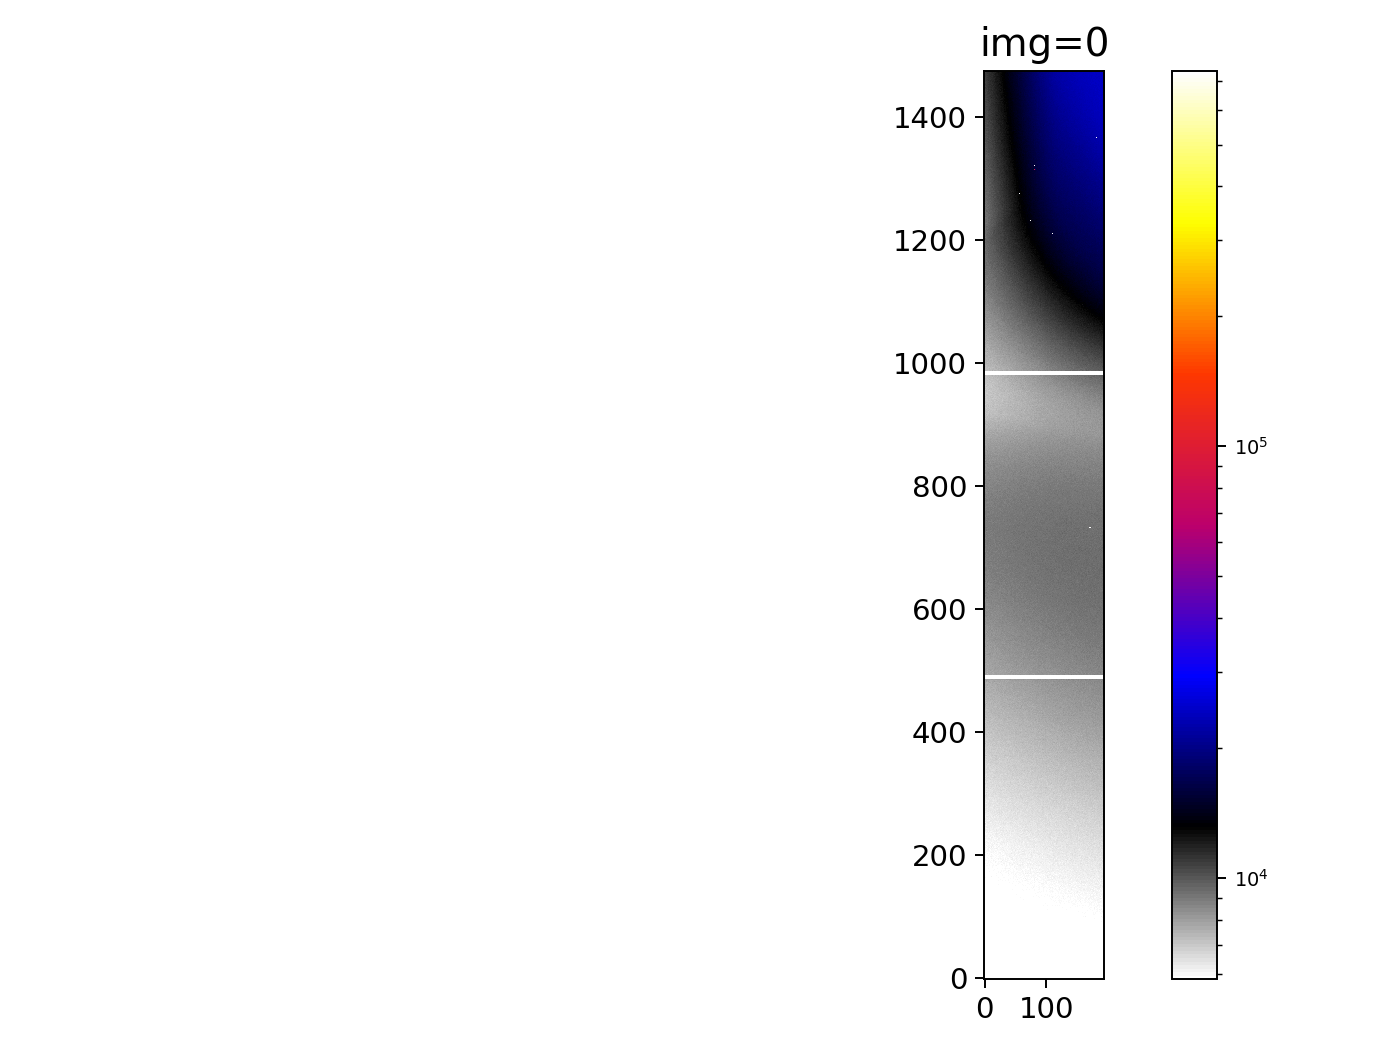

<IPython.core.display.Javascript object>


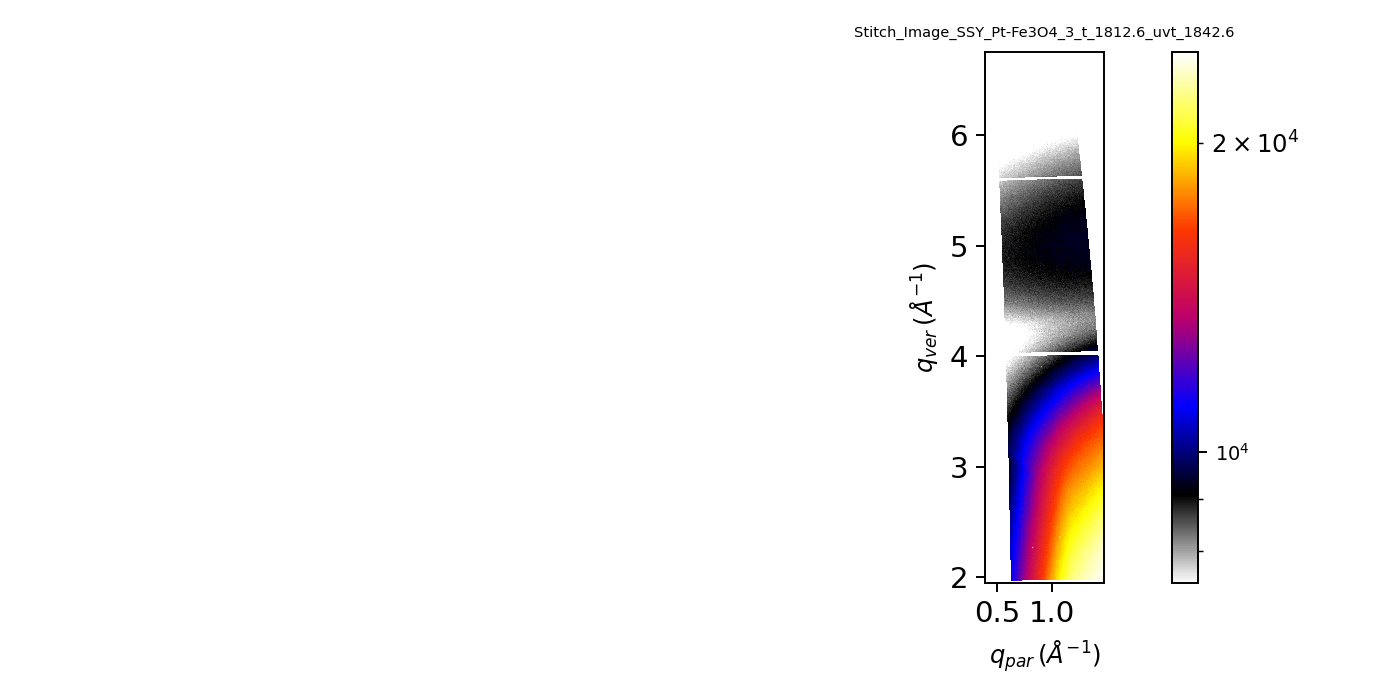

The file: Cir_Avg_SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.csv is saved in /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/WAXS_300/Cir_Avg/


<IPython.core.display.Javascript object>


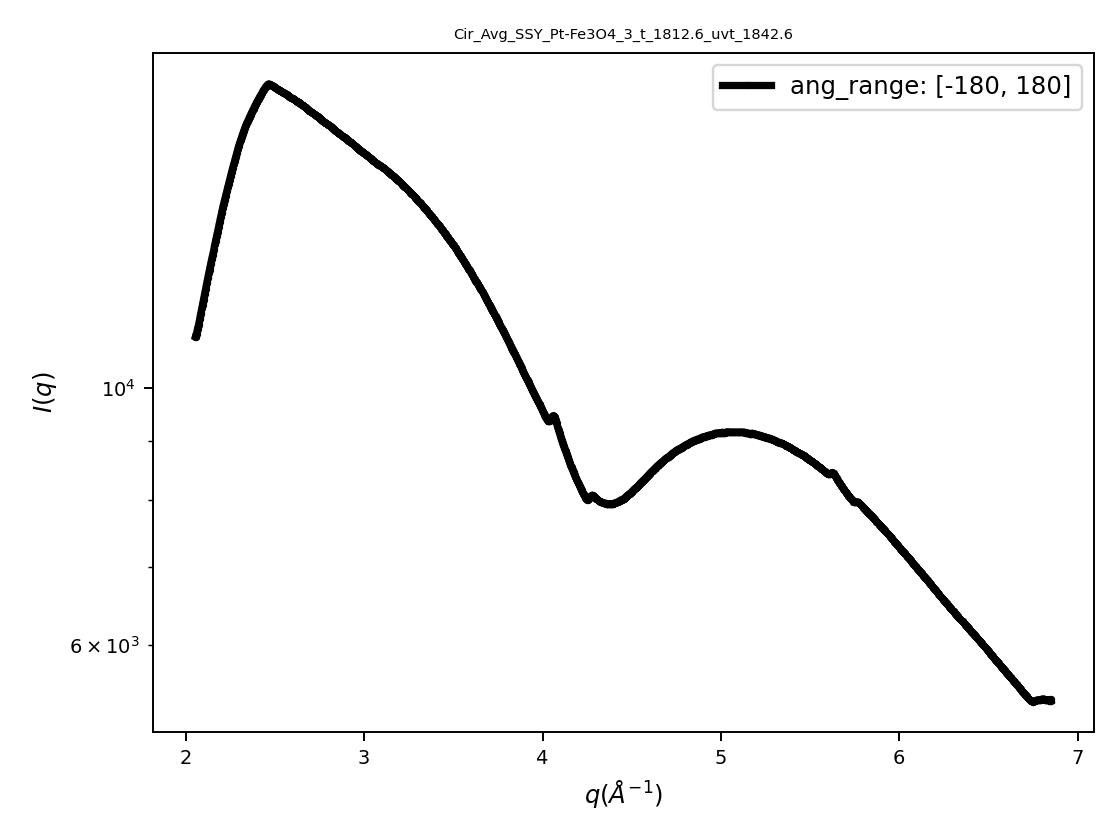

ylim is: None.


<IPython.core.display.Javascript object>


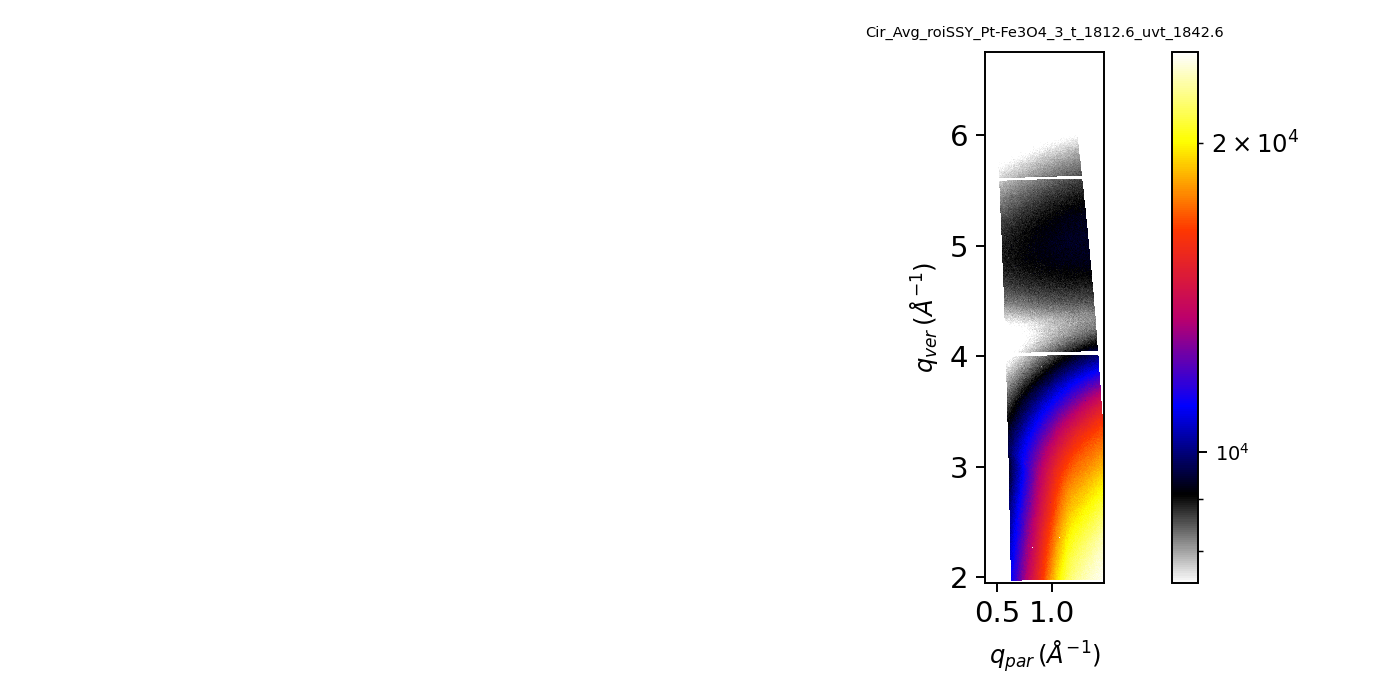

/home/group/Software/pyScatt/pyScatt/plots.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


<IPython.core.display.Javascript object>


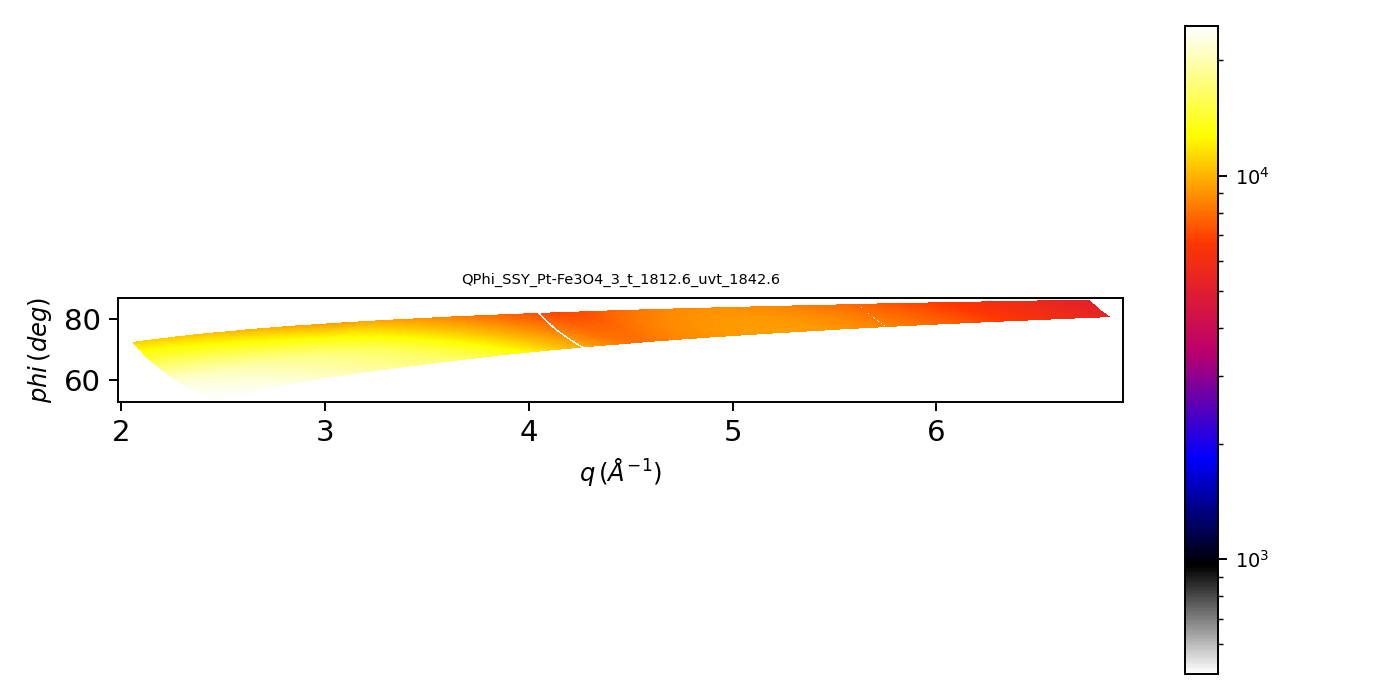

In [20]:
for sam in sample_list:     
    print( 'The sample is: %s.'%sam)   
    PATH = 'WAXS_300'    
    fps = sam_dict [sam]       
    fp = fps[0] 
    RES = {}
    RES['Data']={}         
    full_filenames = [ inDir +  fp for fp in fps   ] # [:1]
    print( full_filenames )  
    try:
        Ang = float( re.search(   r'(_w)(.*)(_e)()',fp).group()[5:-2] )
        if Ang>5:
            full_filenames = full_filenames[::-1]
    except:
        pass
    N =  len(full_filenames)  
    if N==1:
        check_stitch = F    
    #rot_angle = - np.arange( rot_angle_start,  rot_angle_step * N,  rot_angle_step )        
    rot_angle = rot_angle0  #[:2]
    print('The rotation angles are: %s.'%rot_angle)
    pargs_sc['rotation_angles'] = rot_angle
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')          
    try:
        pz = float( re.search(   r'(_z)(.*)(_w)()', fsubs[p]).group()[2:-2 ])
    except:
        pz = 0   
    #############################
    pz = 0
    ##############################   
    print('The pz is:%s'%pz)
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000.   
    
 

    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam  
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}  

    #######################################
    #plot the raw data
    ########################################
    if do_plot_raw:
        run_plot_raw( SC,  vmin= None, vmax=None,mask=None, fontsize=6, )        
    #######################################
    #Stitch WAXS data
    ########################################    

    offset_y =  [  58, 0.0, 13,    165, -29, 6,       -50, -8, 7,      -23 , -2, 6   ]   #2100, 0, 20


    #offset_y = np.zeros( N )

    #SC.offset_y   =   - round( ( pz - 4250.0)/172.0,2 )      
    SC.offset_y   =  offset_y     
    if check_stitch:        
        q_ch, iq_ch, int_dict_ch, qx_dict_ch, qz_dict_ch = SC.check_stitich( offset_y = SC.offset_y )  
        peaks =  None #AgP #* 1.004  # None 
        run_plot_waxs_check_stitch_SMI( SC, peaks =peaks,  ylim=[80,5e6],peak_ylim=[10,7e5],
                                       fontsize=6, xlim=[0,10] ) 
        print( 'Check stith here.')              
    if do_stitch:        
        dq_mag = 5        
        qimg_st, msk_st, qx_st, qz_st, sca_st = SC.stitich( dq_mag = dq_mag, 
                               x=QX, y = QY,    return_full_res=True,               
                              offset_y= SC.offset_y, flag_scale= T ) 
        run_save_qimage( SC, dtype='qimg_st'  )         
        run_plot_qimage( SC, dtype='qimg_st' , zlim=[.4, 1 - 1e-5]   )     

    #######################################
    #Do circular average
    ########################################  
    if do_Qciravg: 
        #qz_roi_range= [ 0.05, 1.2 ] 
        qz_roi_range= None
        #Prange= [0,180]
        Prange= [-180,180]
        qmaskn, q_ca,iq_ca,mask_ca = run_qciravg( SC, ciravg_bins=2500, Prange= Prange, Qrange= None,
                           qx_roi_range=None,qz_roi_range=qz_roi_range,dtype='qimg_st',     )
        run_save_ciravg(  SC   )  
        peaks = None #2*np.pi/dis_AlO   #None 
        run_plot_ciravg( SC, peaks = peaks,xlim= None, ylim=None,fontsize=6, )  
        if show_Qciravg_roi:
            run_plot_qciravg_roi( SC,img_roi=SC.qimg_st*mask_ca,vmin=None,vmax=None,
                                 fontsize=6,  zlim=[.4, 1 - 1e-5] )  
    #######################################
    #Do sector circular average
    ########################################  
    if do_Qciravg_sector:  
        Prange =   [ [w-Qciravg_sector_angle_wid, w+Qciravg_sector_angle_wid] for w in  Qciravg_sector_angles  ]
        qiqs_cas,  qmask_cas = SC.qimg_circular_average_sector(SC.qimg_st , SC.qx_st, SC.qz_st,
                                    Qrange=None,Prange=Prange,bins=1500,mask= qmaskn ) 
        run_save_ciravg_sector( SC  )
        run_plot_ciravg_sector( SC, xlim=[0,8], )#ylim=[.1, 1e5]  )        
        if show_Qciravg_sector:
            run_plot_ciravg_sector_roi( SC  )    

    #######################################
    #Do q-phi analysis
    ########################################              
    if do_Qqphi:  
        #qphi_bins = [ 500, 180 ];
        qphi_bins = [ 500*4, 180*4 ];
        Prange= None;Qrange=None;            
        q_QP, phi_QP, qphi_QP, qphi_mask = SC.qimg_to_qphi(SC.qimg_st, SC.qx_st, SC.qz_st,
                                                  Qrange=Qrange,Prange=Prange,                                                      
                                                  bins=qphi_bins,mask=SC.qmask_st) 
        run_save_Qqphi( SC  )
        run_plot_Qqphi( SC,  fontsize=6, vmin= None, vmax=None, aspect= 0.015, )

        if do_q_qphi:
            q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
            run_save_Qqphi( SC   )
            run_plot_q_iq_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )

        if do_p_qphi:  
            #q_range_roi = None 
            qPeak, iqPeak = find_max_peak(q_QPq,  iq_QPq, xrange=[0.1,6])
            q_range_roi = [ qPeak -.05,  qPeak + .05 ]
            p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
            run_save_q_iq_qphi( SC  )
            run_plot_p_ip_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )  

   ## save data to h5 file 
    if save_HDF:        
        res = SC.res_to_dict( save_raw=save_raw, do_stitch=do_stitch, 
                 do_ciravg = do_Qciravg, do_ciravg_sector = do_Qciravg_sector,
                 do_qimg=do_qimg, do_qphi = do_Qqphi,  
                do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                        )          
        i=0
        RES['Data'][ SC.md['filenames'][i] ] = res         
        K='saved_data';SC.md[K] = SC.saved_data
        K='saved_plots';SC.md[K] = SC.saved_plots    
        RES['md']= SC.md 
        #dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),h5path='/p%02d/%s/'%(p,PATH), mode='a', overwrite_data=True)   
        dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),h5path='/%s/'%(PATH), mode='a', overwrite_data=True)   

# print('Done')       
#D = h5todict( os.path.join(outDir_HDF, '%s.h5'%sam) )   


                


# THE END